<a href="https://colab.research.google.com/github/rnjsdn12332/GAN_study/blob/main/0628.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('./mount') #파일 접근을 위해 드라이브 마운트

Mounted at ./mount


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import pandas
import matplotlib.pyplot as plt


df=pandas.read_csv('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv',header=None)
df.head() #앞부분 데이터

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


각 행의 첫 번쨰는 정답 숫자, 나머지 784개의 값은 28 x 28개의 픽셀 각각의 값

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


데이터 프레임 안에 총 60000개 있다는 것을 알 수 있음
-> 60000개의 훈련데이터

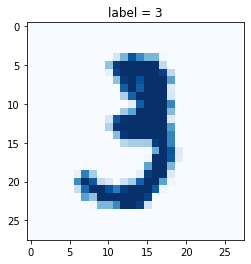

In [ ]:
import matplotlib.pyplot as plt 

#데이터 프레임으로부터 데이터 할당
row=10
data=df.iloc[row] #row번째 행을 선택하여 data변수에 할당

#첫번째 값은 레이블
label=data[0]

#이미지 데이터는 나머지 784개의 값
img=data[1:].values.reshape(28,28)
plt.title("label = "+str(label))
plt.imshow(img, interpolation='none', cmap='Blues')
plt.show()

In [ ]:
class Classifier(nn.Module):
    
    def __init__(self):
	    #부모 클래스 초기화
        super().__init__()
        
        #신경망 레이어 정의
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        
        #손실함수 설정
        self.loss_function = nn.MSELoss() #평균 제곱 오차 MSE


        #SGD 옵티마이저 설정
        self.optimiser=torch.optim.SGD(self.parameters(),lr=0.01) #확률적 경사 하강법 SGD 학습률 0.01

  
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        #모델 실행
        return self.model(inputs)
    
    
    def train(self, inputs, targets):

        #신경망 출력 계산
        outputs = self.forward(inputs)

        #손실 게산
        loss = self.loss_function(outputs, targets)


        #카운터를 증가시킴
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
        
        self.optimiser.zero_grad() #기울기 초기화
        loss.backward() #역전파 실행
        self.optimiser.step() #가중치 업데이트


        pass
    
    #그림으로 표현
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass




신경망 클래스를 하나 만들어서 nn.Moudle로부터 상속받게 함.
학습파라미터를 업데이트 하기 위해 옵티마이저와 손실함수 정의
forward()함수를 구현해 파이토치에서 정보가 네트워크를 타고 흐를 수 있도록 함.

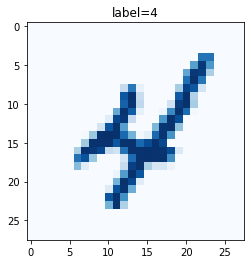

In [ ]:
from torch.utils.data import Dataset

class MnistDataset(Dataset) :

    def __init__(self, csv_file) :
        self.data_df=pandas.read_csv(csv_file, header=None)
        pass
    
    #데이터셋의 길이 반환
    def __len__(self) : 
        return len(self.data_df)

    #데이터셋의 n번째 아이템 반환
    def __getitem__(self, index) : 
        #이미지 목표(레이블)
        label=self.data_df.iloc[index, 0]
        target=torch.zeros((10))
        target[label]=1.0 #원핫인코딩

        #이미지 픽셀값을 담은 것을 0과 1사이 범위로 정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        return label, image_values, target
    
    def plot_image(self, index) :
        img=self.data_df.iloc[index, 1:].values.reshape(28,28)
        plt.title("label="+str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation = "none", cmap="Blues")
        

mnist_dataset=MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')
mnist_dataset.plot_image(9)

In [ ]:
mnist_dataset[9]

(4,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

In [ ]:
#분류기 훈련시키기

%%time
#신경망 생성
C=Classifier()

#MNIST 데이터에 대해 훈련 진행
epoch=3

for i in range(epoch) : 
    print("training epoch", i+1, "of", epoch)
    for label, image_data_tensor, target_tensor in mnist_dataset : 
        C.train(image_data_tensor, target_tensor)
        pass
    pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 3min 20s, sys: 2.29 s, total: 3min 23s
Wall time: 3min 23s


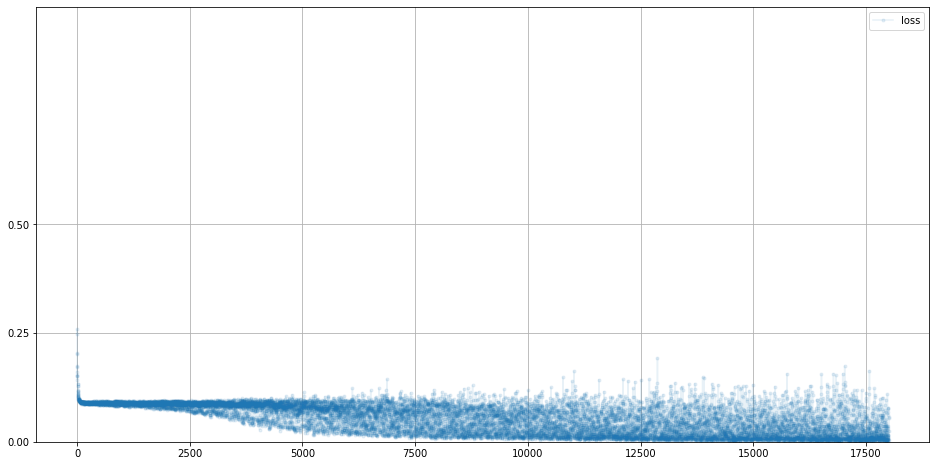

In [ ]:
C.plot_progress()

손실값들이 빠르게 0.1로 떨어지는것을 볼 수 있고 그 다음부터는 노이즈가 있는 상태로 0을 향하여 느리게 훈련됌

In [ ]:
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_test.csv')

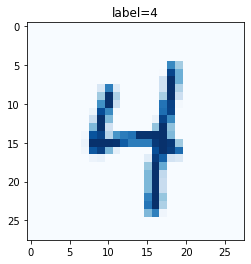

In [ ]:
# 레코드 설정
record = 19

# 이미지와 정답 출력
mnist_test_dataset.plot_image(record)

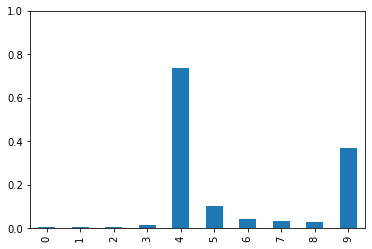

In [ ]:
image_data=mnist_test_dataset[record][1]

#훈련된 신경망으로부터 쿼리
output=C.forward(image_data)

#텐서출력
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

인덱스 19의 레코드에서 이미지 픽셀 값들을 추출하여 image_data에 저장
forward함수를 이용해 전달

output을 단순한 넘파이 행렬로 변환한 후 다시 데이터 프레임으로 래핑해서 막대도표로 표현

In [ ]:
#분류기 성능

score=0
items=0

for label, image_data_tensor, target_tensor in mnist_test_dataset : 
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax()==label) : 
        score+=1
        pass
    items += 1

    pass
print(score, items, score/items)


8666 10000 0.8666
